<a href="https://colab.research.google.com/github/SamsonOrodele/SamsonOrodele/blob/main/ANN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [3]:
#import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
#Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first= True)
gender = pd.get_dummies(X['Gender'], drop_first= True)

In [16]:
#Concatenate the new dummies with the dataframe
X= X.drop(['Geography','Gender'], axis= 1)

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [30]:
X = pd.concat([X,geography,gender], axis = 1)

In [31]:
X.shape

(10000, 11)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [33]:
X_train.shape

(8000, 11)

In [34]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [35]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [36]:
X_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [37]:
X_train.shape

(8000, 11)

In [40]:
#To create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout


In [80]:
#Initializing the ANN
classifier = Sequential()

In [81]:
#Adding the input layer
classifier.add(Dense(units =11, activation = 'relu' ))


In [82]:
#Adding the first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dropout(0.2))

In [83]:
#Adding the second hidden layer
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dropout(0.3))

In [84]:
#Adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [85]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [86]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [87]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [88]:
# Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)


In [89]:
from keras.api._v2.keras import callbacks
model_history = classifier.fit(X_train, y_train,
                               validation_split = 0.33,
                               batch_size=10,
                               epochs = 1000,
                               callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 6ms/step - loss: 0.4562 - accuracy: 0.8130 - val_loss: 0.3975 - val_accuracy: 0.8349
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3973 - accuracy: 0.8367 - val_loss: 0.3728 - val_accuracy: 0.8402
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3806 - accuracy: 0.8406 - val_loss: 0.3704 - val_accuracy: 0.8459
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3843 - accuracy: 0.8438 - val_loss: 0.3691 - val_accuracy: 0.8497
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3739 - accuracy: 0.8457 - val_loss: 0.3722 - val_accuracy: 0.8395
Epoch 6/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3758 - accuracy: 0.8479 - val_loss: 0.3680 - val_accuracy: 0.8485
Epoch 7/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3736 - accuracy: 0.8472 - val_loss: 0.3877 - val_accuracy:

In [90]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

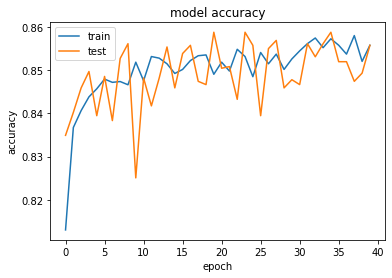

In [91]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

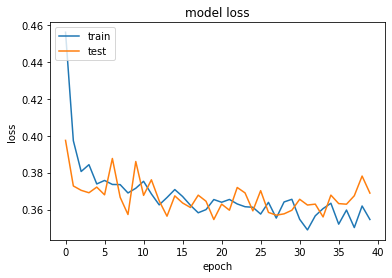

In [92]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 4ms/step


In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [73]:
cm

array([[1547,   48],
       [ 232,  173]])

In [76]:
score = accuracy_score(y_test, y_pred)
score

0.86

In [77]:
classifier.get_weights()

[array([[-1.2262772 , -0.8451746 ,  1.0479555 ,  0.16209917,  1.9549925 ,
         -0.76256186, -1.0180625 , -0.35274354,  0.19254284, -1.1916827 ,
         -0.04650487],
        [-5.068891  , -2.3591433 ,  1.806877  , -1.986188  , -2.9163637 ,
          4.312138  ,  2.76167   ,  5.5939183 , -0.01983847, -6.214016  ,
          1.8469807 ],
        [ 2.5245647 ,  1.1433474 ,  0.5248659 , -0.3690563 , -0.8448789 ,
          0.5313725 , -0.58622694, -0.25995186,  0.5931804 , -0.5768602 ,
          0.11304314],
        [ 0.22689863, -4.5327444 ,  1.3442401 ,  1.494947  , -1.23428   ,
          0.635122  , -2.564841  ,  0.3339414 , -4.766729  , -1.4019197 ,
          0.872876  ],
        [-0.43510863, -1.8086708 , -1.3459707 ,  1.0186245 , -2.233203  ,
          2.796122  , -1.293135  , -1.7345922 ,  4.9154835 ,  0.33477336,
          5.311336  ],
        [-0.29963225, -1.1934534 ,  0.70897937, -1.594935  ,  1.320312  ,
          0.39350736, -1.5365238 , -1.1185973 ,  0.37193787,  0.5240558